<a href="https://colab.research.google.com/github/machinelearning147/MachineLearning-YouTube/blob/master/k_means_clustering_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to clustering algorithms

“Any intelligent fool can make things bigger, more complex, and more violent. It takes a touch of genius—and a lot of courage—to move in the opposite direction.” —E.F. Schumacher

In this tutorial, we will look into clustering the data into groups. 

We try to answer a few questions and go through an example 

1.   What is Clustering?
2.   Where it is useful?
3.   Clustering algorithm types
4.   K-means implementation from scratch 

**What is Clustering?**

Clustering is a process of grouping the data, it involves automatically discovering natural groups in the data. In machine learning context, it is an unsupervised technique, where data has no associated labels. 

![link text](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FKPjMy.png&f=1&nofb=1)

**Where it is useful?**

It is useful to detect patterns, when you don't know what you are looking for. 

For example,


*   Customer Shopping Patterns
*   Group Emails
*   Image Segmentation



**Clustering algorithm types**



1.   Partition Algorithms

    *   K-Means
    *   Mixure of Gaussians
    *   Spectral Clustering

2.   Hierarchical Algorithms

    *   Bottom-up - agglomerative
    *   Top down - divisive


**K-means implementation from scratch**



```
K-means clustering algorithm:

    select k points as initial centroids (say k=2)

    find distance from data points to each centroid. 

    assign to Goup 1 if distance of the points from centroid 1 are less than centroid 2
    otherwise assign to Group 2. 

    compute mean value of each Group and update the centroids. 

    Repeat until there is no change in centroids.
```








# Hands on Example : Implementing from scratch

## Import all the required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline
from sklearn.datasets import make_blobs

## Helper Functions

In [2]:
def plot_kmeans(xy, c12):
    plt.scatter(xy[:,0], xy[:,1])
    plt.scatter(c12[:,0], c12[:,1], marker="x", color='r')
    plt.show()
    
def find_distance(xy,c12):
    dist0 = np.linalg.norm(xy-c12[0],axis=1,ord=2)
    dist1 = np.linalg.norm(xy-c12[1],axis=1,ord=2)
    return (dist0, dist1)

def find_groups(D):
    S = D[0]<=D[1]
    return S.astype('float')


def update_centroids(xy, S):
    S0 = np.where(S==0)
    S1 = np.where(S==1)
    c12[0] = (np.sum(xy[S0],axis=0))/len(S0[0]+1e-6) # cluster1 mean
    c12[1] = (np.sum(xy[S1],axis=0))/len(S1[0]+1e-6) #cluster2 mean 
    return c12


In [3]:
plt.figure(figsize=(80, 80))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

<Figure size 5760x5760 with 0 Axes>

## Data Set Creation for clustering

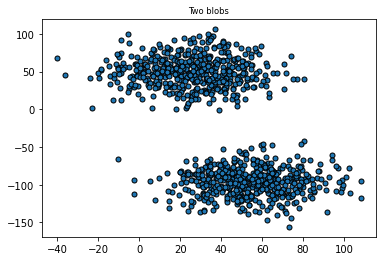

In [4]:
plt.subplot(111)
plt.title("Two blobs", fontsize='small')
X1, _ = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=20.2, center_box=(-100.0, 100.0), shuffle=True, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
            s=25, edgecolor='k')


In [5]:
xy = X1

### Data (2-dimentional)

In [6]:
xy

array([[  61.89474099,  -63.23856905],
       [  46.74133059, -115.38959714],
       [  47.73546376,  -82.43386887],
       ...,
       [  60.18153129, -105.35991661],
       [  13.56246673,   49.17049128],
       [  77.06558875, -109.94537274]])

### centroids initialization

In [7]:
c12 = np.random.randn(2,2)
c12

array([[ 0.43961976,  0.75381485],
       [-0.37280794, -1.36010302]])

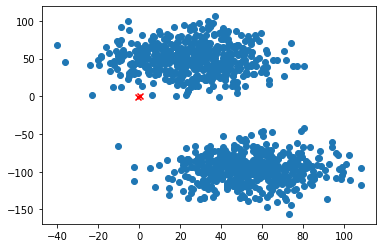

In [8]:
plot_kmeans(xy, c12)

In [9]:
min_x, max_x = min(xy.T[1]) ,max(xy.T[0]) 
print(min_x, max_x)

-156.03746490355462 108.39831687453136


In [10]:
min_v = min(min(xy[0]), min(xy[1]))
max_v = max(max(xy[0]), max(xy[1]))
print(min_v, max_v)

-115.38959713827404 61.8947409898491


## K-means algorithm in action

[[ 54.11618648 -96.27665006]
 [ 26.07133152  50.08682547]]


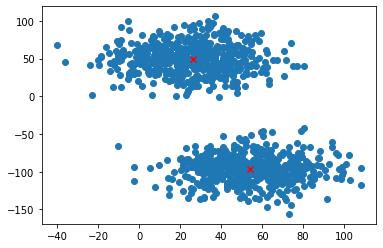

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


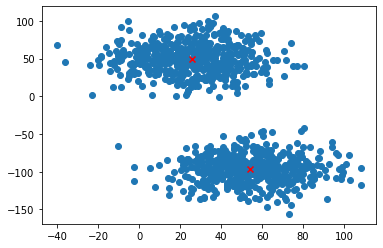

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


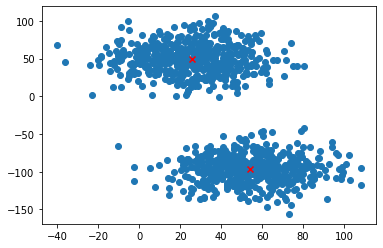

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


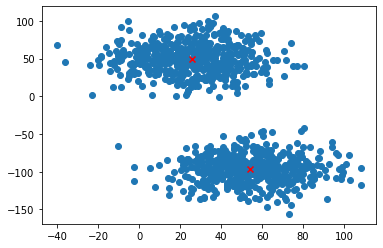

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


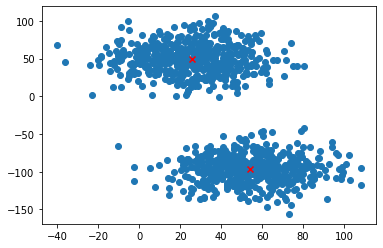

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


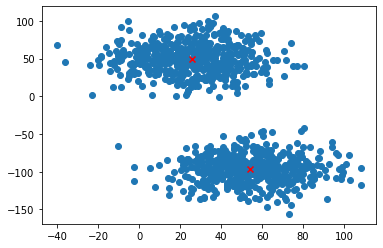

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


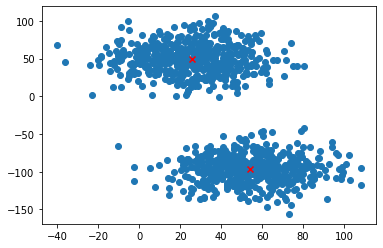

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


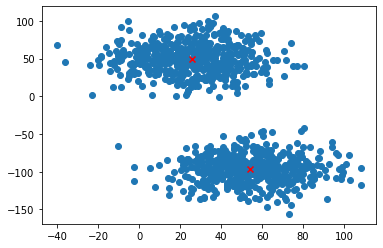

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


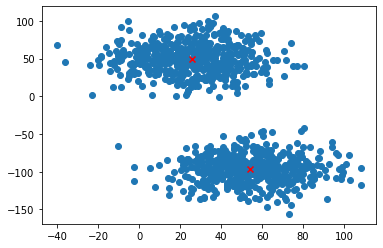

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


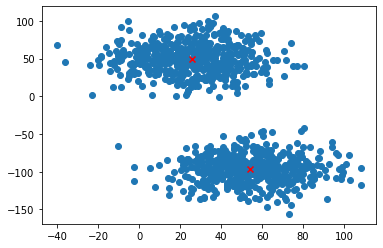

[[ 54.27043336 -96.47131116]
 [ 25.97317436  49.98875962]]


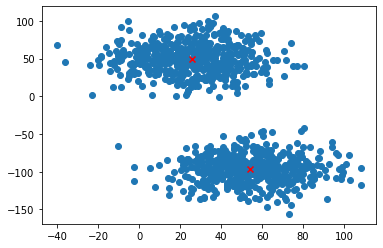

[[ 25.97317436  49.98875962]
 [ 54.27043336 -96.47131116]]


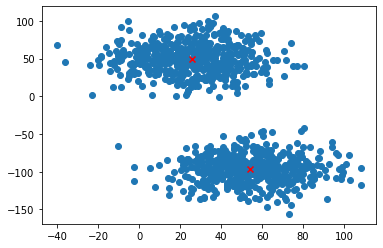

12


In [11]:
count = 0
C = defaultdict(list)
for i in range(20):
    D = find_distance(xy,c12)
    G = find_groups(D)
    c12 = update_centroids(xy, G)
    while i<10 and np.isnan(c12).any()==True:
        c12 = np.random.randn(2,2)
    print(c12)
    #print(D,G,c12)
    plot_kmeans(xy, c12)
    count+=1
    C[i] = c12
    if i>10 and C[i-1].sum() == C[i].sum():
        print(count)
        break

\begin{equation}
ax+by=c\\
by = -ax+c\\
y = 1/b*(-ax+c)
\end{equation}

## Visualizing the clusters

In [12]:
def find_slope(p1, p2):
    x1, y1 = p1
    x2, y2 = p2
#     print(y2, y1)
#     print(x2, x1)
    m = (y2-y1)/(x2-x1)
    return m
def perpendicular_slope(m1):
    return -(1/m1)
# needed to find the line passing throgh the points
# needed to find the perpendicular line passing through a point

def get_c(slope, point):
    c = point[1] - slope*point[0]
    return c
    
def line_passing_through(point, slope):
    return get_c(slope, point)

In [13]:
p1, p2 = c12[1]
print(p1)
print(p2)

54.270433355172834
-96.47131116117146


In [14]:
G.astype('int')

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,

### Visualize using matplotlib

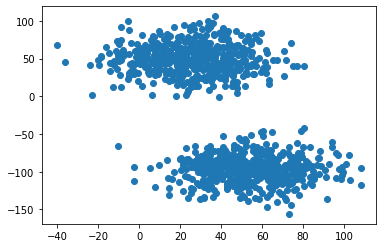

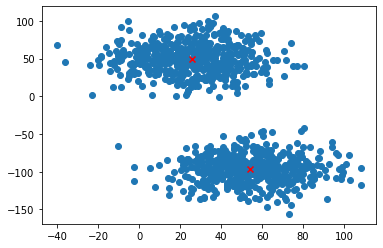

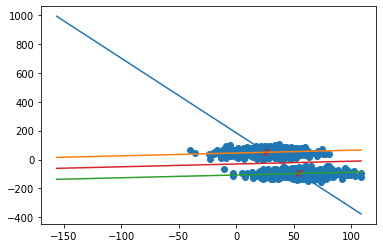

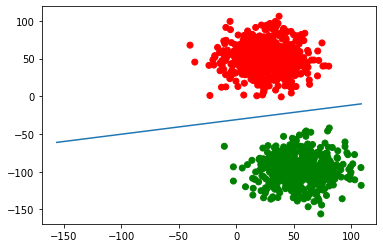

In [15]:

plt.gcf().clear()
plt.scatter(xy[:,0], xy[:,1])
plt.show()
plot_kmeans(xy, c12)
m = find_slope(c12[0], c12[1])

c = line_passing_through(c12[0], m)
c = line_passing_through(c12[1], m)

x = np.linspace(min_x, max_x, 10, dtype='float')
y = m*x+c
plt.plot(x,y)




m1 = m
m2 = perpendicular_slope(m1)
c1 = get_c(m2, c12[0])
y = m2*x+c1
plt.plot(x,y)


c2 = get_c(m2, c12[1])
y = m2*x+c2
plt.plot(x,y)


cm = get_c(m2, np.mean(c12, axis=0))
y = m2*x+cm
plt.plot(x,y)

# K-means clusters classified categories
categories = np.array(G.astype('int'))

colormap = np.array(['r', 'g'])
plot_kmeans(xy, c12)
plt.scatter(xy[:,0], xy[:,1], c=colormap[categories])
plt.plot(x,y)
plt.show()


### Visualize using seaborn

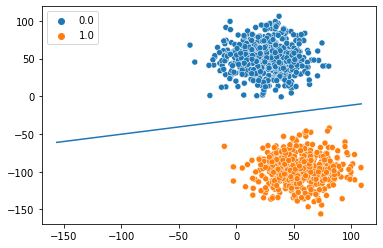

In [16]:
# List of colors in the color palettes
rgb_values = sns.color_palette(palette='brg', n_colors=2)

# Get Unique color_labels
color_labels = np.unique(np.array(G.astype('int')))
# Map continents to the colors
color_map = dict(zip(color_labels, rgb_values))
color_mapping = np.array([list(c) for _,c in color_map.items()])
color_mapping
# Finally use the mapped values
# plt.scatter(xy[:,0], xy[:,1], c=color_mapping[categories])
sns.scatterplot(x=xy[:,0], y=xy[:,1], hue=G)
sns.lineplot(x=x, y=y)